# Chapter.3 Single-variate Linear Regression without Bias Term

## Programming Assignment.3-02 Loss Functions

이번 PA 03-02에서는 하나의 data sample에 대해 loss function이 어떻게 형성되는지 살펴보고, 이 data sample을 이용하여 predictor를 학습시켜봅니다.

또한 여러개의 data sample들에 대해 각각 loss function이 어떻게 달라지는지 확인하고, 각 data sample들을 이용하여 predictor를 학습시키면 어떤 변화가 생기는지 살펴봅니다.

이때 각 data sample들은 PA 03-01과 마찬가지로 $y = 3x$에서부터 만들어집니다.

PA 03-02는 다음과 같은 Step들로 이루어집니다.
<ul>
    <li> Step.1 Loss Function for One Sample </li>
    <li> Step.2 Learning with One Sample </li>
    <li> Step.3 Cost Functions for Different Data Samples </li>
    <li> Step.4 Learning with Different Data Samples </li>
    <li> Step.5 Learning with Dataset </li>
    <li> Step.6 Random Shuffling </li>
</ul>



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Loss Function for One Sample

먼저 data sample $(x^{(1)},y^{(1)}) = (1,3)$ 하나에 대한 loss function를 그려봅니다.  
이 data sample에 대한 loss는 다음과 같이 구할 수 있습니다.

$$
\mathcal{L}^{(1)} = (y^{(1)} - \hat{y}^{(1)})^{2} = (y^{(1)} - \theta x^{(1)})^{2}
$$

***
**Programming**

임의의 $\theta$에 대한 loss function을 그리세요.  
이때 $\theta$는 target theta$(\theta^{*})$는 3이므로 0부터 6까지 100개의 점을 이용하고, 이 $\theta$에 따른 loss를 그립니다.

(Hint.1) np.linspace( ): 임의의 $\theta$를 설정  
(Hint.2) np.power( ): $y - \hat{y}$의 제곱을 구하기 위한 함수

Text(0, 0.5, '$\\mathcal{L}$')

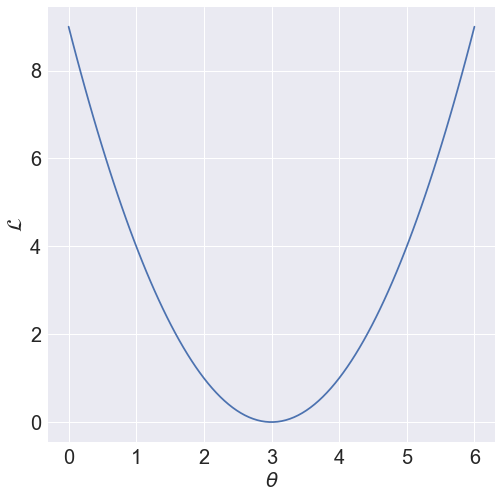

In [6]:
##### Start Your Code(Data Sample) #####
x1 = 1
y1 = 3*x1
##### End Your Code(Data Sample) #####

##### Start Your Code(Loss Function) #####
th_range = np.linspace(3 - 3, 3 + 3, 100)
loss_funct = np.power(y1 - th_range*x1, 2)
##### End Your Code(Loss Function) #####

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(th_range, loss_funct)
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xlabel(r'$\theta$', fontsize = 20)
ax.set_ylabel(r'$\mathcal{L}$', fontsize = 20)

위의 loss function에서 loss가 최소가 되는 $\theta$가 target function의 weight와 같음을 확인하세요.  
따라서 data sample을 가장 잘 표현하는 $\theta$는 loss function을 최소화시키는 3이 됩니다.

***
**Programming**

앞으로의 코드 중복을 방지하기 위하여 위의 loss function을 그리는 코드를 함수로 만들어줍니다.  
이때, loss function을 그려줄 axes도 argument로 받아주도록 합니다.

(Hint.1) 함수 내부의 코드는 위의 코드에서 argument만 조정해주면 됩니다.

In [7]:
def get_loss_funct(x, y, ax):
    ##### Start Your Code(Loss Function Functionalization) #####
    th_range = np.linspace(3 - 3, 3 + 3, 100)
    loss_funct = np.power(y - th_range*x, 2)

    ax.plot(th_range, 
            loss_funct,
            label = r'$(x,y) = ($' + str(x) + ',' + str(y)+ ')')
    ax.tick_params(axis = 'both', labelsize = 20)
    ax.set_xlabel(r'$\theta$', fontsize = 20)
    ax.set_ylabel(r'$\mathcal{L}$', fontsize = 20)
    ax.legend(loc = 'upper center', fontsize = 20)
    ##### End Your Code(Loss Function Functionalization) #####

***
## Step.2 Learning with One Sample

위의 x1, y1를 이용하여 predictor를 학습시켜봅니다.  
data sample이 하나이므로 epoch보단 iteration이라는 표현이 적절하므로 PA 03-01에서의 epochs을 iterations으로 고쳐줍니다.  

***
**Programming**  
이 학습을 위한 코드는 PA 03-01와 변수명 외에 달라지는 것은 없습니다.  
이때 initial theta는 0.1, learning rate은 0.01, total iteration은 500으로 설정하세요.


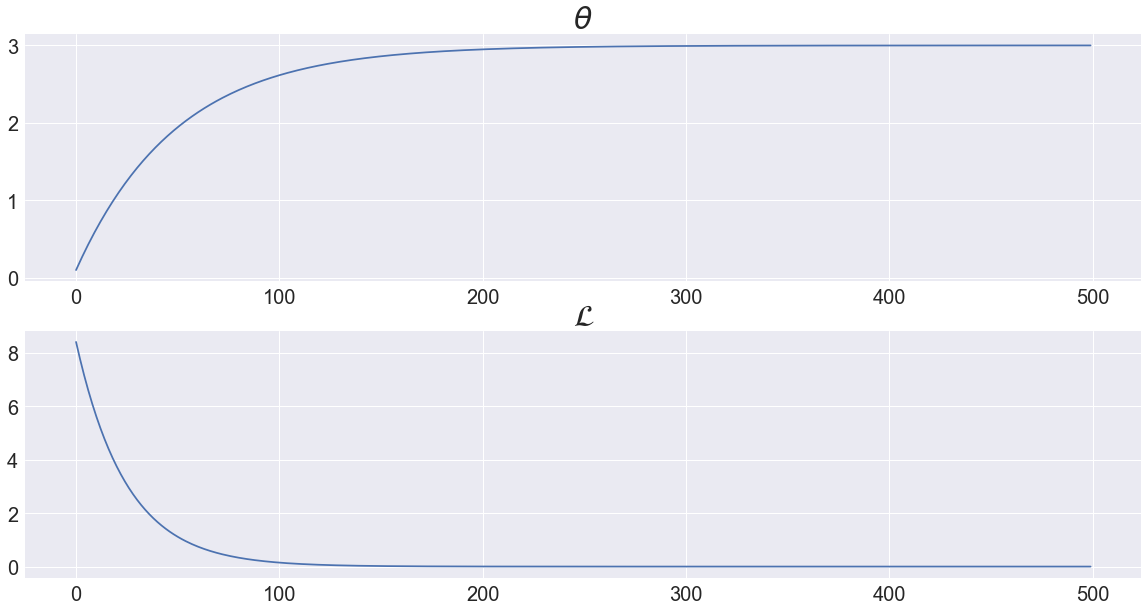

In [8]:
##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.01
iterations = 500
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []

for iteration in range(iterations):
    ##### Start Your Code(Loss Calculation) #####
    pred = th*x1
    loss = np.power(y1 - pred, 2)
    ##### End Your Code(Loss Calculation) #####

    th_list.append(th)
    loss_list.append(loss)
    
    ##### Start Your Code(Gradient Descent Method) #####
    th = th + 2*x1*lr*(y1 - pred)
    ##### End Your Code(Gradient Descent Method) #####
    
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th_list)
ax[1].plot(loss_list)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

***
**Programming**  
위의 코드도 중복사용을 피하기 위해 함수로 만들어줍니다.

trainer함수는 total iteration, learning rate의 정보와 data sample의 x,y값을 받아 th_list, loss_list를 return해줍니다.

In [9]:
def trainer(iterations, lr, x, y):
    ##### Start Your Code(Trainer Function Functionalization) #####
    th = 0.1
    th_list = []
    loss_list = []

    for iteration in range(iterations):
        pred = th*x
        loss = np.power(y - pred, 2)
        th_list.append(th)
        loss_list.append(loss)
        
        th = th + 2*x*lr*(y - pred)
    return th_list, loss_list
    ##### Start Your Code(Trainer Function Functionalization) #####

***
**Programming**  
위에서 만든 2개의 함수를 이용하여 학습 코드를 단순화해봅니다.

이때 위의 상황과 마찬가지고 iteration은 500, learning rate은 0.01로 설정해줍니다.

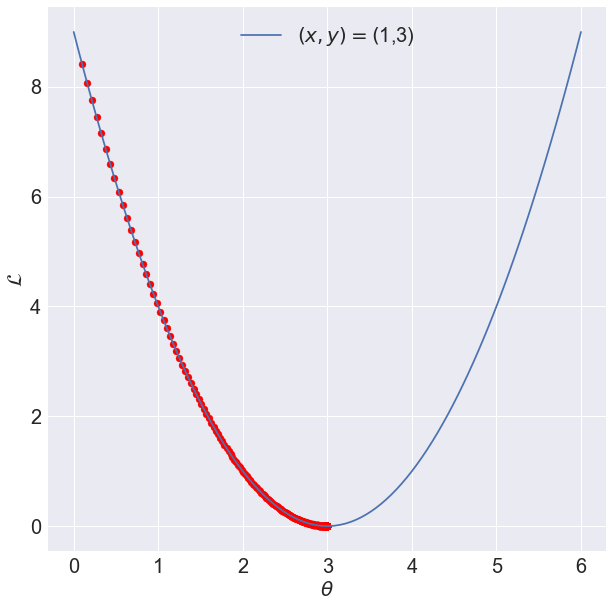

In [10]:
##### Start Your Code(Data Sample) #####
x1 = 1
y1 = 3*x1
##### End Your Code(Data Sample) #####

fig, ax = plt.subplots(figsize = (10,10))

##### Start Your Code(Loss Function Visualization) #####
get_loss_funct(x1, y1, ax)
##### End Your Code(Loss Function Visualization) #####


##### Start Your Code(Training) #####
th_list, loss_list = trainer(500, 0.01, x1, y1)
##### End Your Code(Training) #####

ax.scatter(th_list, loss_list, color = 'r')

***
## Step.3 Cost Functions for Different Data Samples

위의 함수 2개로 학습을 확인한 코드를 이용하여 다른 data sample에 대해서도 학습을 시켜봅니다.

***
**Programming**  
이번에는 동일한 target function $y = 3x$에서 만들어진 $(x^{(1)},y^{(1)}) = (2,6)$에 대해 학습을 진행해봅니다.  
학습을 진행한 후, $(x^{(1)},y^{(1)}) = (1,3)$을 이용한 학습과의 차이점을 분석해보길 바랍니다.

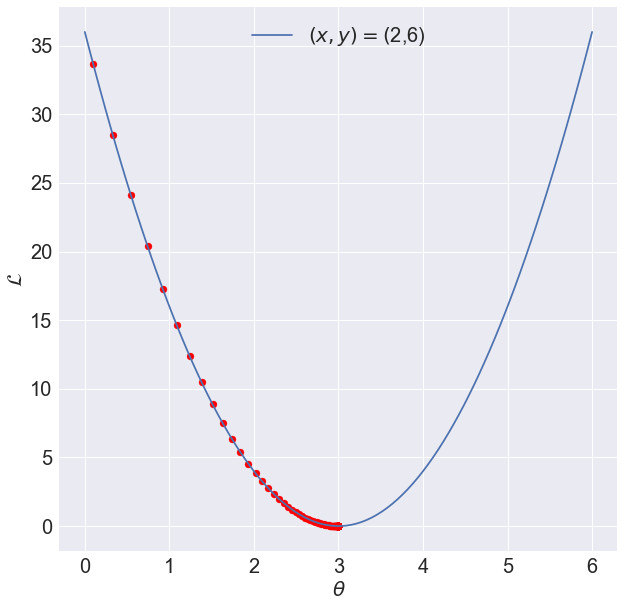

In [12]:
##### Start Your Code(Data Sample) #####
x2 = 2
y2 = 3*x2
##### End Your Code(Data Sample) #####

fig, ax = plt.subplots(figsize = (10,10))

##### Start Your Code(Loss Function Visualization) #####
get_loss_funct(x2, y2, ax)
##### End Your Code(Loss Function Visualization) #####


##### Start Your Code(Training) #####
th_list, loss_list = trainer(500, 0.01, x2, y2)
##### End Your Code(Training) #####

ax.scatter(th_list, loss_list, color = 'r')

***
## Step.4 Learning with Different Data Samples

위의 내용을 바탕으로 3개의 data sample들 
$$ \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), (x^{(3)},y^{(3)})\} = \{(0.5,1.5), (1,3), (2,6)\} $$
에 대해 학습이 진행되는 모습을 비교해봅니다.

***
**Programming**  
아래의 코드는 같은 axes에 3개의 data sample들에 대해 $\theta$가 update되는 모습을 비교하기 위한 코드입니다.

이때 iteration은 20, learning rate은 0.1로 설정해줍니다.

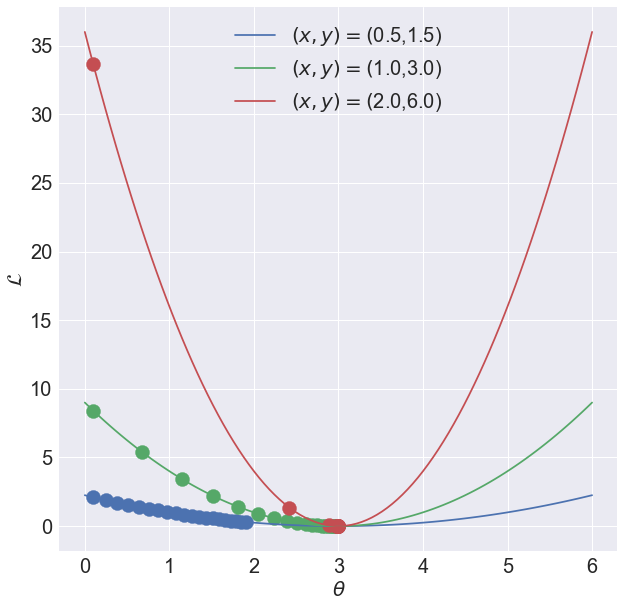

In [14]:
x_data = np.array([0.5, 1, 2])
y_data = 3*x_data

fig, ax = plt.subplots(figsize = (10,10))

for x, y in zip(x_data, y_data):
    ##### Start Your Code(Loss Funtion and Training) #####
    get_loss_funct(x, y, ax)
    th_list, loss_list = trainer(20, 0.1, x, y)
    ##### Start Your Code(Loss Funtion and Training) #####
    ax.scatter(th_list, loss_list, s = 200)

***
## Step.5 Learning with Dataset

실제 딥러닝에서는 하나의 data sample만을 이용해 학습을 하지 않고, dataset 안에 들어있는 다양한 data sample들을 이용하여 학습합니다.  
따라서 이번에는 dataset에 들어있는 data sample들 하나씩을 이용하여 $\theta$를 학습시키는 방법을 알아봅니다.

***
**Programming**  
미리 만들어놓은 x_data, y_data에 들어있는 x,y값을 이용하여 위해 built-in function zip()을 이용합니다.  
이를 통해 하나의 data sample을 뽑은 뒤 gradient descent method를 이용하여 $\theta$를 학습시킵니다.

이때 initial theta는 0.1, learning rate은 0.01, epochs은 5로 설정해줍니다.

(Hint.1) 위에서 만든 함수를 이용하는 것이 아닌 PA_03_01와 마찬가지로 loss를 구한 뒤, gradient descent method를 이용합니다.

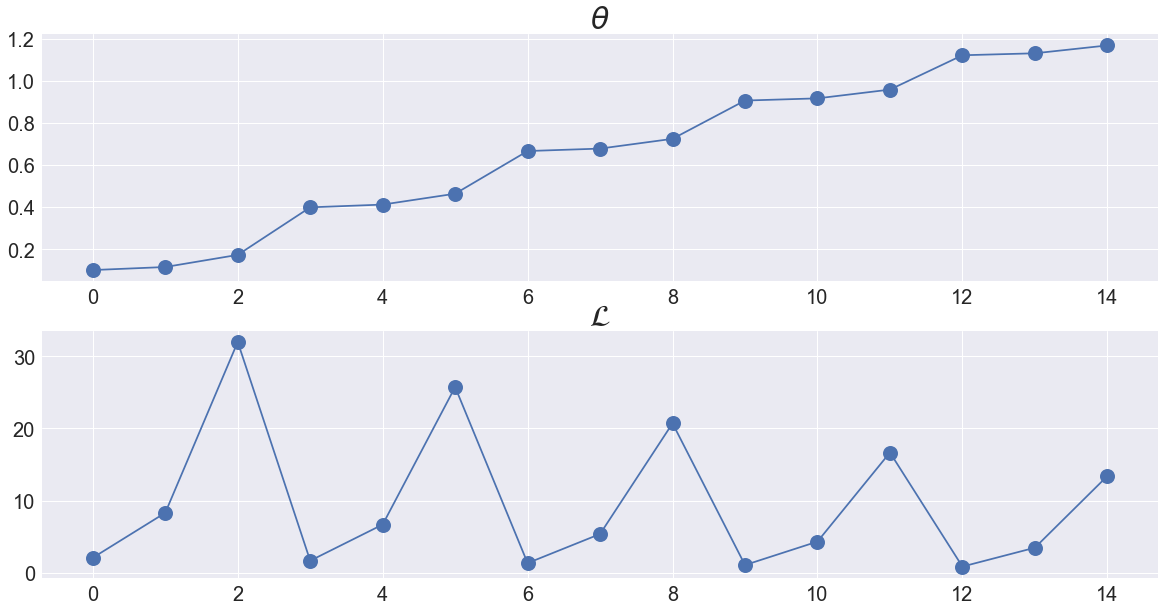

In [15]:
x_data = np.array([0.5, 1, 2])
y_data = 3*x_data

##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.01
epochs = 5
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []
    
for epoch in range(epochs):
    for x,y in zip(x_data, y_data):
        ##### Start Your Code(Loss Calculation) #####
        pred = th*x
        loss = np.power(y - pred, 2)
        ##### End Your Code(Loss Calculation) #####
        
        th_list.append(th)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th = th + 2*x*lr*(y - pred)
        ##### End Your Code(Gradient Descent Method) #####
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th_list, marker = 'o', markersize = 15)
ax[1].plot(loss_list, marker = 'o', markersize = 15)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)
    

***
## Step.6 Random Shuffling

실제 딥러닝 프로젝트에서는 dataset 전체를 이용하여 학습을 시킨 뒤, data sample의 순서를 바꿔줍니다.  
이를 통해 $\theta$에 대한 규칙적인 update를 막을 수 있습니다.

***
**Programming**  
위에 작성한 학습 코드를 그대로 이용하되, epoch마다 random shuffle을 이용하여 학습을 진행하고,  
random shuffle의 유무에 따라 학습의 경향이 어떻게 바뀌는지 분석해보세요.

(Hint.1) np.random.shuffle()  
(Hint.2) np.random.shuffle()은 row-wise로 진행되기 때문에 x_data, y_data를 하나의 변수에 담아주는 것이 편합니다.  
(Hint.3) np.hstack()

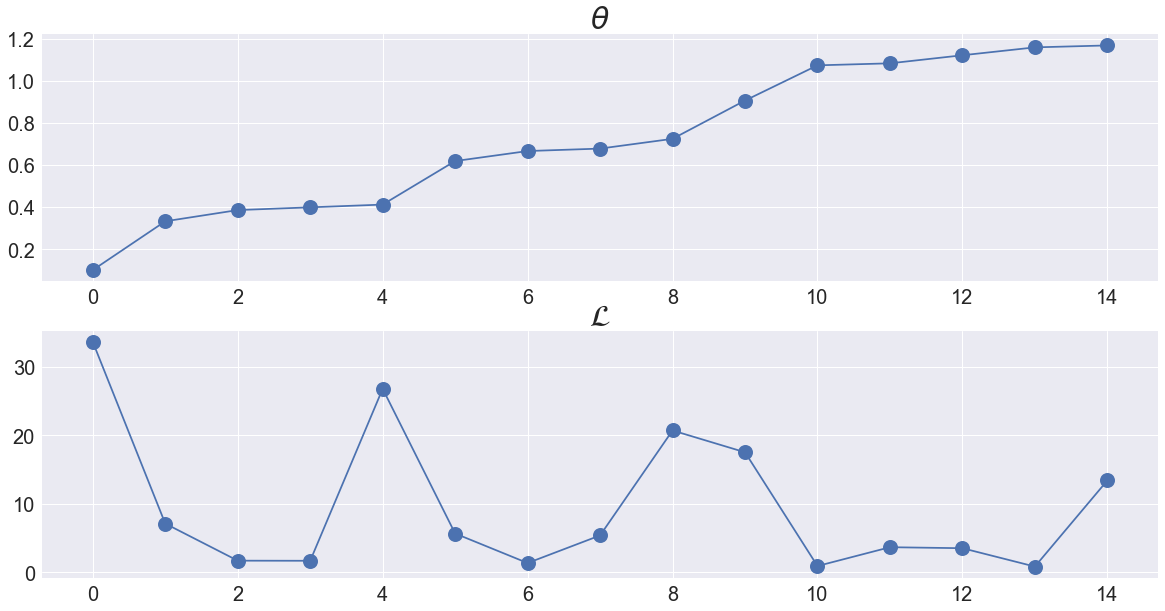

In [96]:
x_data = np.array([0.5, 1, 2]).reshape(-1,1)
y_data = 3*x_data
##### Start Your Code(np.hstack) #####
data = np.hstack((x_data, y_data))
##### End Your Code(np.hstack) #####

##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.01
epochs = 5
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []
    
for epoch in range(epochs):
    np.random.shuffle(data)
    for x,y in data:
        ##### Start Your Code(Loss Calculation) #####
        pred = th*x
        loss = np.power(y - pred, 2)
        ##### End Your Code(Loss Calculation) #####
        
        th_list.append(th)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th = th + 2*x*lr*(y - pred)
        ##### End Your Code(Gradient Descent Method) #####
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th_list, marker = 'o', markersize = 15)
ax[1].plot(loss_list, marker = 'o', markersize = 15)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)